In [1]:
"""
(Practical tip) Table of contents can be compiled directly in jupyter notebooks using the following code:
I set an exception: if the package is in your installation you can import it otherwise you download it 
then import it.
"""
try:
    from jyquickhelper import add_notebook_menu 
except:
    !pip install jyquickhelper
    from jyquickhelper import add_notebook_menu

In [2]:
"""
Output Table of contents to navigate easily in the notebook. 
For interested readers, the package also includes Ipython magic commands to go back to this cell
wherever you are in the notebook to look for cells faster
"""
add_notebook_menu()

## 1. Brief Introduction to Deep Learning

### a) A short story on Deep Learning 


Deep learning is a set of learning methods attempting to model data with complex architectures combining different non-linear transformations. The elementary bricks of deep learning are the neural networks, that are combined to
form the deep neural networks.

These techniques have enabled significant progress in the fields of sound and image processing, including facial recognition, speech recognition, computer vision, automated language processing, text classification (for example
spam recognition, sentimental analysis and so on). Potential applications are very numerous. A spectacularly example is the AlphaGo program, which learned to play the go game by the deep learning method, and beated the world champion in 2016.

There exist several types of architectures for neural networks, e.g Multilayer Perceptrons (MLP), the Convolutional Neural Networks (CNN) for image processing, Recurrent Neural Networks (RNN) for sequential data such as text or time series etc ... **We will study and experiment on these various architectures together along our labs**. Overall, they are based on deep cascade of layers that need clever stochastic optimization algorithms and choice of structures to lead to very impressive results, although very few theoretical fondations are available till now.

### b) Neural networks


A neural network is an application, non linear with respect to its parameters $\theta$ that associates to an entry $x$ an output $y = f(x, \theta)$. For the sake of simplicity, we assume that $y$ is unidimensional, but it could also be multidimensional. This application $f$ has a particular form that we will precise. **The neural networks can be use for regression or classification as we will see in this lab**. As usual in statistical learning, the parameters θ are estimated from a learning sample (the **train set**). 

A neuron is these networks refers to a function $f_j$ of the input $x = (x_1, ..., x_d)$ weighted by a vector of connection weights $w_j = (w_{j, 1}, ..., w_{j, d})$, completed by a bias $b_j$, and an **activation function** $\phi$ such that
$$ y_j = f_j(x) = \phi( \langle w_j, x \rangle + b_j )$$

As we will see in this lab, several activation functions can be used depending on the task e.g

- identity function $\phi(x) = x$
- sigmoid (or logistic) function: $\phi(x) = 1/ (1+ e^{-x})$
- hyperbolic tangent function ("tanh"): $\phi(x) = (e^{x} - e^{-x})/(e^x + e^{-x})$
- rectified linear unit (ReLU) function: $\phi(x) = max(0, x)$

**We will experiment on these activation functions on a simple task of regression in the section 2 of this Lab.**

To optimize for a given task the parameters $(w_j, b_j)$ of each neuron composing the NN, a backpropagation algorithm is applied in order to minimize w.r.t parameters a **loss function** adapted to the task, for instance:

- The cross-entropy loss function can be used to optimize parameters for a binary classification problem over $n$ samples: $$\min_{\theta} \frac{1}{n} \sum_{i \leq n } y_i \log p_\theta(x_i) +(1-y_i) \log (1 - p_{\theta}(x_i))$$
where $p_\theta(x_i) = f(x_i, \theta)$ is the probability predicted by the NN $f$ for the sample $x_i$ to belong to class $y_i$. 

- The mean square error loss function can be used to optimize parameters for a regression problem over $n$ samples:
$$\min_{\theta} \frac{1}{n} \sum_{i \leq n} (y_i - f(x_i, \theta))^2$$

Note that the optimization scheme used with NN impose some regularity properties on the used activation functions. At first the most common practice was to consider fully differentiable activation functions (e.g identity, sigmoid, tanh etc..). Then, relaxing these regularity conditions for instance by using ReLU proved to be useful for improving NN learning. These considerations will be further studied in Lab 3.


We specify now the usual form that takes the function $f$ designing a Neural Network. Another name to NN is **Multilayer Perceptron (MLP)**. It refers to a structure composed by **several hidden layers of neurons** where the output of a neuron of a layer becomes the input of a neuron of the next layer. On last layer, called output
layer, we may apply a different activation function as for the hidden layers depending on the type of problems we have at hand : regression (linear activation) or classification (sigmoid activation).

![MLP](https://static.javatpoint.com/tutorial/tensorflow/images/multi-layer-perceptron-in-tensorflow.png)

MLP have a basic architecture since each unit (or neuron) of a layer is linked to all the units of the next layer but has no link with the neurons of the same layer. **The hyperparameters of the architecture are the number
of hidden layers and of neurons in each layer. The activation functions are also to choose by the user**.

## 2. A visual intuition on activation functions

Using a regression task on the sinus function, we'll try to get an intuition of the effect of activation functions.

### a) Create samples from a sinus function

In [3]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

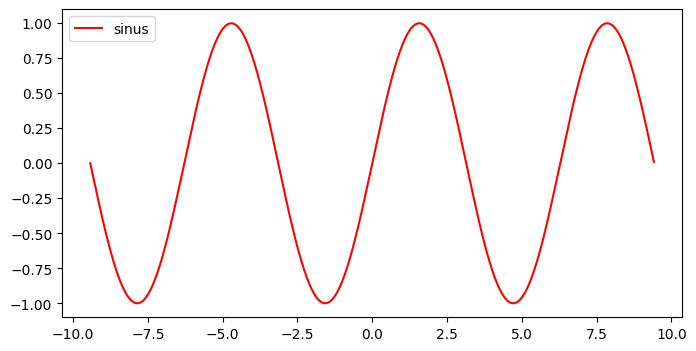

In [4]:
X = np.arange(-3*np.pi,3*np.pi,0.01)
y = np.sin(X)

plt.figure(figsize=(8,4))
plt.plot(X, y, label='sinus', color='red')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

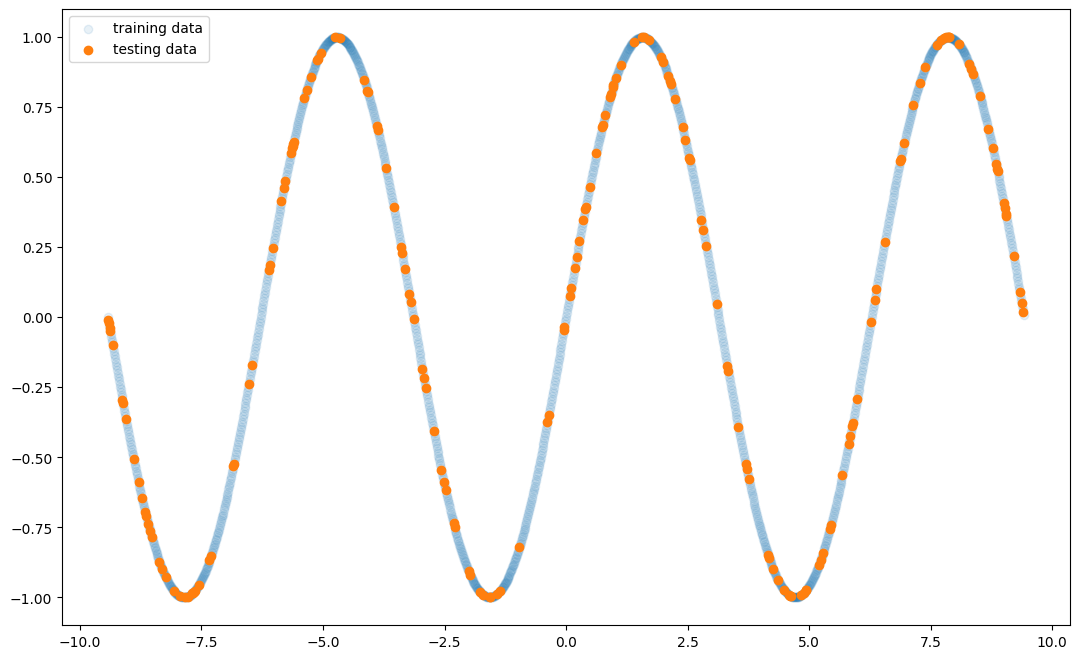

In [5]:
# Split the dataset as a train (90%) and test(10%) using the function train_test_split of scikit-learn.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

plt.figure(figsize=(13,8))
plt.scatter(X_train, y_train, alpha = 0.1, color='C0', label='training data')
plt.scatter(X_test, y_test,alpha=1., color='C1', label='testing data')

plt.legend()
plt.show

### b)  Build a first regression model

$$[TODO - Students]$$ Build a model with 1 hidden layer in 1 dimension and train it on x_train, y_train. What loss should we use ? Formally, what is the operation performed by this NN ?

Try different activations for the hidden layer and plot the predictions obtained on x_test.

In [6]:
inputs = Input(shape=(1, ))

x_relu = Dense(input_shape = (1,), units=1, activation='relu')(inputs)
x_sig = Dense(input_shape = (1,), units=1, activation='sigmoid')(inputs)
x_tanh = Dense(input_shape = (1,), units=1, activation='tanh')(inputs)

out_relu = Dense(input_shape = (1,), units=1, activation='relu')(x_relu)
out_sig = Dense(input_shape = (1,), units=1, activation='sigmoid')(x_sig)
out_tanh = Dense(input_shape = (1,), units=1, activation='tanh')(x_tanh)

model_relu = Model(inputs, out_relu)
model_sig = Model(inputs, out_sig)
model_tanh = Model(inputs, out_tanh)

model_relu.compile(loss='mse', optimizer='adam')
model_sig.compile(loss='mse', optimizer='adam')
model_tanh.compile(loss='mse', optimizer='adam')


In [7]:
history_relu = model_relu.fit(X_train, y_train, epochs=20)
history_sig = model_sig.fit(X_train, y_train, epochs=20)
history_tanh = model_tanh.fit(X_train, y_train, epochs=20)

Epoch 1/20
53/53 [==============================] - 1s 2ms/step - loss: 0.5022
Epoch 2/20
53/53 [==============================] - 0s 2ms/step - loss: 0.5022
Epoch 3/20
53/53 [==============================] - 0s 2ms/step - loss: 0.5022
Epoch 4/20
53/53 [==============================] - 0s 2ms/step - loss: 0.5022
Epoch 5/20
53/53 [==============================] - 0s 3ms/step - loss: 0.5022
Epoch 6/20
53/53 [==============================] - 0s 2ms/step - loss: 0.5022
Epoch 7/20
53/53 [==============================] - 0s 2ms/step - loss: 0.5022
Epoch 8/20
53/53 [==============================] - 0s 3ms/step - loss: 0.5022
Epoch 9/20
53/53 [==============================] - 0s 3ms/step - loss: 0.5022
Epoch 10/20
53/53 [==============================] - 0s 3ms/step - loss: 0.5022
Epoch 11/20
53/53 [==============================] - 0s 3ms/step - loss: 0.5022
Epoch 12/20
53/53 [==============================] - 0s 3ms/step - loss: 0.5022
Epoch 13/20
53/53 [==============================

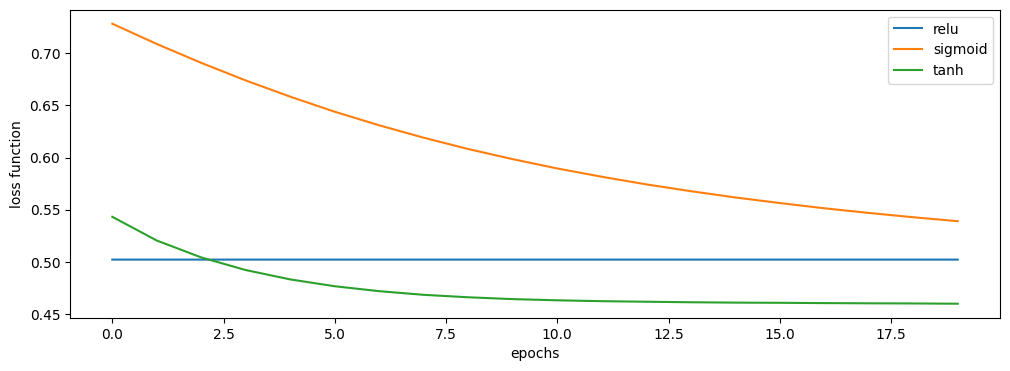

In [8]:
plt.figure(figsize=(12,4))
plt.plot(history_relu.history['loss'], label="relu")
plt.plot(history_sig.history['loss'], label="sigmoid")
plt.plot(history_tanh.history['loss'], label="tanh")
plt.ylabel('loss function'); plt.xlabel('epochs')
plt.legend()
plt.show()

In [9]:
def plot_prediction(title, model):
    y_hat_test = model.predict(X_test)

    plt.figure()
    plt.scatter(X_test, y_test, label = 'ground_truth', alpha=0.1)
    plt.scatter(X_test, y_hat_test, label = 'predicted', alpha=0.5)
    plt.legend()
    
    plt.title(title)
    plt.show()

6/6 [==============================] - 0s 3ms/step


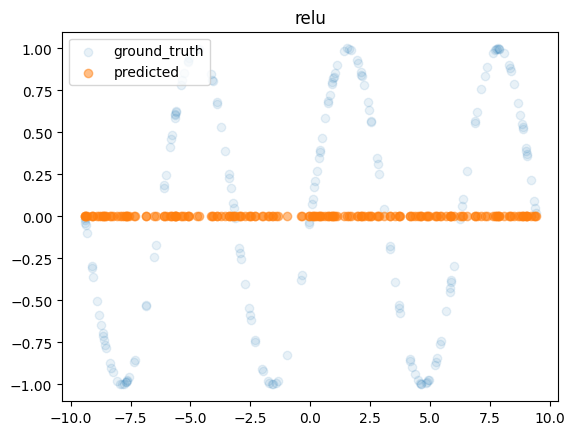

6/6 [==============================] - 0s 3ms/step


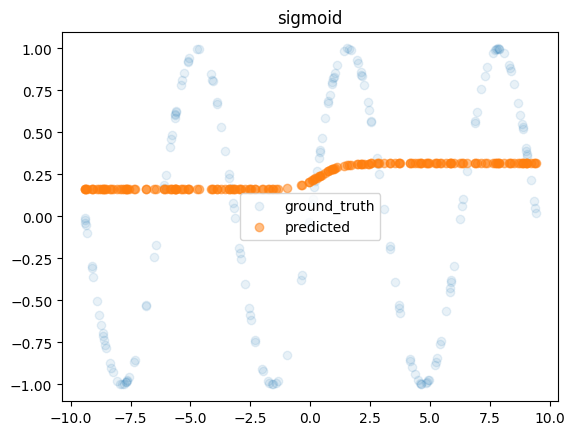

6/6 [==============================] - 0s 2ms/step


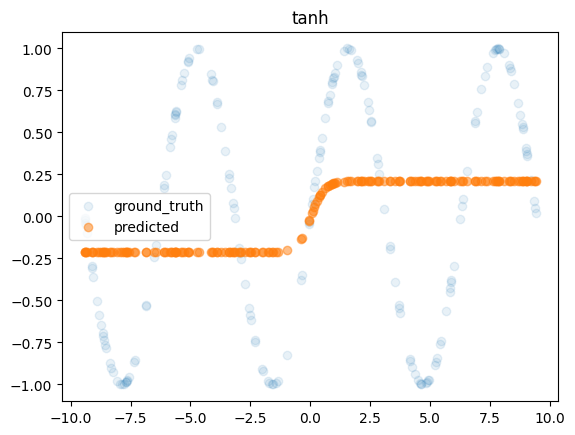

In [10]:
plot_prediction("relu", model_relu)
plot_prediction("sigmoid", model_sig)
plot_prediction("tanh", model_tanh)

### c) Enhance this model exploring NN hyperparameters

$$[TODO - Students]$$ Try adding layers and increasing the layers dimension to better fit the test data. You can use the following function to quickly build your models.

In [11]:
def build_sin_regression(activation, n_layers, hidden_dim):
    input = Input(shape=(1, ))

    for i in range(n_layers):
        if i==0:
            x = Dense(input_shape = (1,), units=hidden_dim, activation=activation)(input)
        else:
            x = Dense(input_shape = (hidden_dim,), units=hidden_dim, activation=activation)(x)

    output = Dense(input_shape = (hidden_dim,), units=1, activation=activation)(x)
    model = Model(input, output, name = 'sinus_regression')
    return model

In [12]:
model = build_sin_regression(activation = 'tanh', n_layers = 4, hidden_dim = 64)
model.compile(loss='mse', optimizer='adam') 
# batchsize c'est le nb de samples qu'il considère pour 
# la gradient descent sur lequel tu calcules la loss. 
# epochs c'est le nb d'aller retour. Optimizer c'est la façon dont il détermine alpha.

model.summary()

Model: "sinus_regression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_6 (Dense)             (None, 64)                128       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-

In [13]:
callbacks_list = [
    EarlyStopping(monitor='val_loss', 
                  min_delta=0.005, 
                  patience=5, 
                  verbose=2, 
                  mode='min', 
                  restore_best_weights=True)
                 ]

history = model.fit(X_train, y_train, validation_split = 0.1, callbacks=callbacks_list, batch_size=32, epochs=20)

Epoch 1/20
48/48 [==============================] - 1s 9ms/step - loss: 0.4258 - val_loss: 0.3370
Epoch 2/20
48/48 [==============================] - 0s 4ms/step - loss: 0.2589 - val_loss: 0.2031
Epoch 3/20
48/48 [==============================] - 0s 5ms/step - loss: 0.1723 - val_loss: 0.1300
Epoch 4/20
48/48 [==============================] - 0s 4ms/step - loss: 0.1491 - val_loss: 0.1156
Epoch 5/20
48/48 [==============================] - 0s 5ms/step - loss: 0.1036 - val_loss: 0.1067
Epoch 6/20
48/48 [==============================] - 0s 6ms/step - loss: 0.0871 - val_loss: 0.0746
Epoch 7/20
48/48 [==============================] - 0s 4ms/step - loss: 0.0692 - val_loss: 0.0602
Epoch 8/20
48/48 [==============================] - 0s 4ms/step - loss: 0.0584 - val_loss: 0.0568
Epoch 9/20
48/48 [==============================] - 0s 4ms/step - loss: 0.0515 - val_loss: 0.0445
Epoch 10/20
48/48 [==============================] - 0s 9ms/step - loss: 0.0464 - val_loss: 0.0420
Epoch 11/20
48/48 [

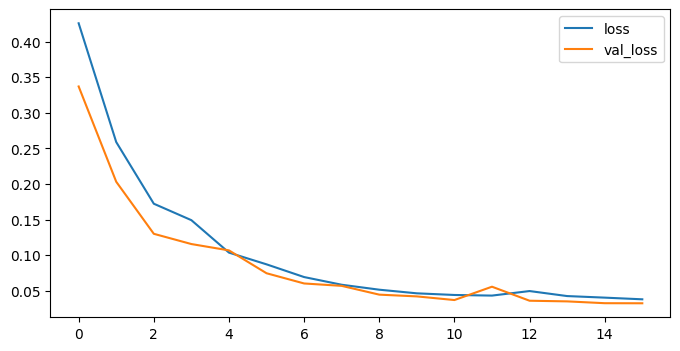

In [14]:
# Visualize the evolution of both loss functions (train, val)
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

6/6 [==============================] - 0s 2ms/step


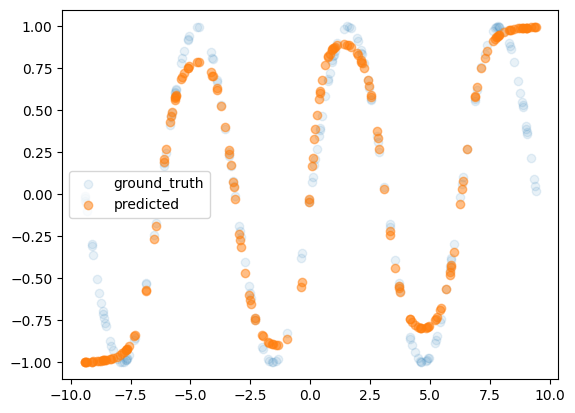

In [15]:
# Plot true labels vs predicted labels
y_hat_test = model.predict(X_test)

plt.scatter(X_test, y_test,label = 'ground_truth', alpha=0.1)
plt.scatter(X_test, y_hat_test,label = 'predicted', alpha=0.5)

plt.legend()
plt.show()

## 3. Experiment on the classification dataset Iris

In this section, we will consider the IRIS dataset which is a very easy multi-class classification dataset.

### a) Load the dataset

A good practice when you are asked to handle a new dataset on which you are expected to design predictive models such as Neural Networks, is to **start with a bit of data analysis**.

Common questions you should ask yourself:

- How many samples can I extract information from ? 
- What is the dimension of the sample features ?
- How many classes do I have to be able to predict ? Are they equally represented in the dataset (i.e do I have more information for some classes than others) ?

In [16]:
# Load the dataset from sklearn

from sklearn.datasets import load_iris

data = load_iris()
# get samples
X = data.data
print('samples:', X.shape)
# get labels
y = data.target
print('labels:', y.shape)

print('[STUDENTS] How many unique labels are present in the dataset ? How many samples are available for each label ?')

nb_classes = np.unique(y).shape[0]
print("Unique labels = ", nb_classes)
print("Sample per label", [(i, np.count_nonzero(y == i)) for i in set(y)])


samples: (150, 4)
labels: (150,)
[STUDENTS] How many unique labels are present in the dataset ? How many samples are available for each label ?
Unique labels =  3
Sample per label [(0, 50), (1, 50), (2, 50)]


Note that in practice, you will only have access to this information for a subset of the data, referred as **train dataset**. And the goal of Machine Learning on classification tasks is to design models (e.g NN) which are able to **predict the labels of samples never seen**. This concept relates to the notion of the **Generalization** ability of a given model. 
Here on this synthetic dataset, we have access to all the labels so we will simulate a real-world scenario by splitting the dataset in 3 parts:

- a train dataset that will be used for optimizing our NN parameters.
- a validation dataset that will be used to during training to quantifity the generalization ability of our model on samples which are not directly involved in parameters optimization.
- a test dataset that will never be seen during training on which you want to be able to generalize well.

$$ [TO DO STUDENTS]$$ 

- **1) Split the IRIS dataset in a train (80% of the full dataset) and test datasets such that both sets are balanced, i.e have equal proportions of labels.**
- **2) Learn a shallow NN using linear activations for the hidden layers. Then analyse your results using accuracies and confusion matrices.**
- **3) Learn a shallow NN using ReLU activations for the hidden layers.  Then analyse your results using accuracies and confusion matrices.**

In [17]:
# [TO DO 1.] Split the dataset as train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [18]:
# Perform a one-hot encoding of y_train and y_test
# You can either do it with sklearn.preprocessing.OneHotEncoder or code it with numpy
n_classes = np.unique(y_train).shape[0]

y_train_onehot = np.zeros((y_train.shape[0], n_classes))
y_train_onehot[np.arange(y_train.shape[0]), y_train] = 1

y_test_onehot = np.zeros((y_test.shape[0], nb_classes))
y_test_onehot[np.arange(y_test.shape[0]), y_test] = 1

### b) Build good NN models for multi-class classification


[TO DO]
**2) Learn a shallow NN using linear activations for the hidden layers. Then analyse your results using accuracies and confusion matrices.**


In [19]:
def build_iris_model(activation, n_layers, hidden_dim) -> Model:
    input = Input(shape=(4, ))

    for i in range(n_layers):
        if i==0:
            x = Dense(input_shape = (4,), units=hidden_dim, activation=activation)(input)
        else:
            x = Dense(input_shape = (hidden_dim,), units=hidden_dim, activation=activation)(x)

    output = Dense(input_shape = (hidden_dim,), units=3, activation=activation)(x)
    model = Model(input, output, name = 'iris_regression')
    return model

In [30]:
model= build_iris_model(activation = 'linear', n_layers = 10, hidden_dim = 20)
model.compile(loss="mse", optimizer= "adam")

model.summary()

Model: "iris_regression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_30 (Dense)            (None, 20)                100       
                                                                 
 dense_31 (Dense)            (None, 20)                420       
                                                                 
 dense_32 (Dense)            (None, 20)                420       
                                                                 
 dense_33 (Dense)            (None, 20)                420       
                                                                 
 dense_34 (Dense)            (None, 20)                420       
                                                                 
 dense_35 (Dense)            (None, 20)            

In [21]:
callbacks_list = [
    EarlyStopping(
        monitor='val_loss', 
        min_delta=0.005, 
        patience=5, 
        verbose=2, 
        mode='min', 
        restore_best_weights=True)
]

history = model.fit(X_train, y_train_onehot, validation_split = 0.1, callbacks=callbacks_list, batch_size=32, epochs=20)

Epoch 1/20
4/4 [==============================] - 2s 134ms/step - loss: 1.2489 - val_loss: 0.3739
Epoch 2/20
4/4 [==============================] - 0s 38ms/step - loss: 0.3481 - val_loss: 0.3389
Epoch 3/20
4/4 [==============================] - 0s 43ms/step - loss: 0.3434 - val_loss: 0.1436
Epoch 4/20
4/4 [==============================] - 0s 37ms/step - loss: 0.1851 - val_loss: 0.1396
Epoch 5/20
4/4 [==============================] - 0s 36ms/step - loss: 0.1410 - val_loss: 0.1642
Epoch 6/20
4/4 [==============================] - 0s 36ms/step - loss: 0.1485 - val_loss: 0.1926
Epoch 7/20
4/4 [==============================] - 0s 37ms/step - loss: 0.1518 - val_loss: 0.1707
Epoch 8/20
4/4 [==============================] - 0s 44ms/step - loss: 0.1333 - val_loss: 0.1502
Epoch 8: early stopping


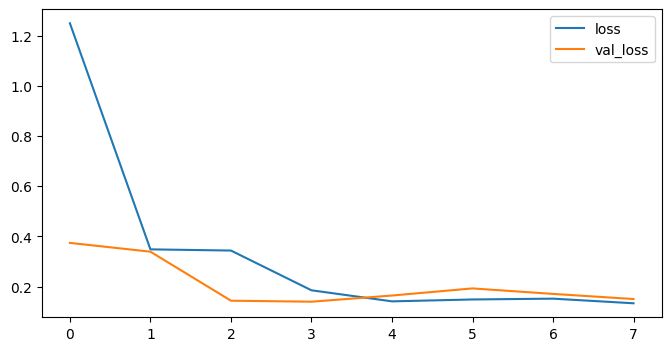

In [22]:
# Visualize the evolution of both loss functions (train, val)
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

In [23]:
# Evaluate predictions on the train and test datasets in terms of accuracy
from sklearn.metrics import confusion_matrix
ypred_onehot = model.predict(X_train) 
y_pred = ypred_onehot.argmax(axis=1)
y_pred.shape
print('train accuracy =', (np.sum(y_pred == y_train)/ y_train.shape[0]))
print(confusion_matrix(y_train, y_pred))

ypred_onehot = model.predict(X_test) 
y_pred = ypred_onehot.argmax(axis=1)
# y_pred.shape
print('test accuracy =', (np.sum(y_pred == y_test)/ y_test.shape[0]))

print(confusion_matrix(y_test, y_pred))

4/4 [==============================] - 0s 2ms/step
train accuracy = 0.6166666666666667
[[35  5  0]
 [ 1 39  0]
 [ 0 40  0]]
1/1 [==============================] - 0s 36ms/step
test accuracy = 0.6333333333333333
[[ 9  1  0]
 [ 0 10  0]
 [ 0 10  0]]


[TO DO STUDENTS]
- **3) Learn a shallow NN using ReLU activations for the hidden layers.  Then analyse your results using accuracies and confusion matrices.**

In [24]:
model = build_iris_model(activation = 'relu', n_layers = 7, hidden_dim = 20)
model.compile(loss="mse", optimizer= "adam")

model.summary()

Model: "iris_regression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_22 (Dense)            (None, 20)                100       
                                                                 
 dense_23 (Dense)            (None, 20)                420       
                                                                 
 dense_24 (Dense)            (None, 20)                420       
                                                                 
 dense_25 (Dense)            (None, 20)                420       
                                                                 
 dense_26 (Dense)            (None, 20)                420       
                                                                 
 dense_27 (Dense)            (None, 20)            

In [25]:
callbacks_list = [
    EarlyStopping(
        monitor='val_loss',
        min_delta=0.005, 
        patience=5, 
        verbose=2, 
        mode='min', 
        restore_best_weights=True)
    ]

history = model.fit(X_train, y_train_onehot, validation_split = 0.1, callbacks=callbacks_list, batch_size=16, epochs=50)

Epoch 1/50
7/7 [==============================] - 1s 50ms/step - loss: 0.2702 - val_loss: 0.2889
Epoch 2/50
7/7 [==============================] - 0s 10ms/step - loss: 0.2279 - val_loss: 0.2462
Epoch 3/50
7/7 [==============================] - 0s 9ms/step - loss: 0.1864 - val_loss: 0.2077
Epoch 4/50
7/7 [==============================] - 0s 11ms/step - loss: 0.1361 - val_loss: 0.1369
Epoch 5/50
7/7 [==============================] - 0s 11ms/step - loss: 0.0966 - val_loss: 0.1022
Epoch 6/50
7/7 [==============================] - 0s 10ms/step - loss: 0.0843 - val_loss: 0.0927
Epoch 7/50
7/7 [==============================] - 0s 10ms/step - loss: 0.0797 - val_loss: 0.0868
Epoch 8/50
7/7 [==============================] - 0s 10ms/step - loss: 0.0746 - val_loss: 0.0868
Epoch 9/50
7/7 [==============================] - 0s 12ms/step - loss: 0.0712 - val_loss: 0.0885
Epoch 10/50
7/7 [==============================] - 0s 12ms/step - loss: 0.0682 - val_loss: 0.0764
Epoch 11/50
7/7 [=============

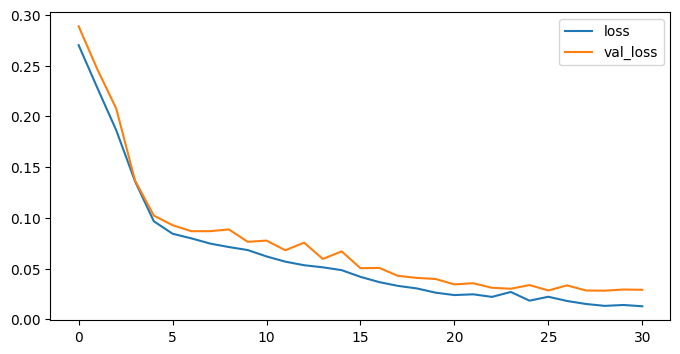

In [26]:
# Visualize the evolution of both loss functions (train, val)
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

In [27]:
# Evaluate predictions on the train and test datasets in terms of accuracy
ypred_onehot = model.predict(X_train)
y_pred = ypred_onehot.argmax(axis=1)
y_pred.shape
print('train accuracy = %s'%(np.sum( y_pred == y_train)/ y_train.shape[0]))
print(confusion_matrix(y_train, y_pred))

ypred_onehot = model.predict(X_test)
y_pred = ypred_onehot.argmax(axis=1)
y_pred.shape
print('test accuracy = %s'%(np.sum( y_pred == y_test)/ y_test.shape[0]))
print(confusion_matrix(y_test, y_pred))

4/4 [==============================] - 0s 3ms/step
train accuracy = 0.975
[[40  0  0]
 [ 0 39  1]
 [ 0  2 38]]
1/1 [==============================] - 0s 44ms/step
test accuracy = 0.9666666666666667
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


## 4. Experiment on the Boston regression dataset

$$[TO DO STUDENTS]$$

**1. Load and preprocess the dataset to learn models and quantify their generalization abilities**

**2. Design a first model only using linear activation functions**

**3. Benchmark your first model to a new model where ReLU activation functions are used for hidden layers**

### a ) Load dataset

In [33]:
from sklearn.datasets import load_boston


data = load_boston()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

### b) Baseline using linear activations

In [29]:
def build_boston_model(activation_mode, layer_num, hidden_layer):
    
    

model = build_boston_model(...)


IndentationError: expected an indented block after function definition on line 1 (181471183.py, line 5)

### c) Improve model using non-linear activations

In [ ]:
model = build_boston_model(...)
